# Naive Bayes Classifiers

Naive Bayes classifiers are a set of supervised learning algorithms which work by applying **Bayes Theorem**. For example, if we were interested in predicting a class label $y_j$ from a set of input features $\left \{ {x_1, \dots , x_n} \right \}$ then Bayes Theorem would give us the probability of an observation $i$ belonging to class $y_j$ given a set of input features $x_i$ as:


$$P(y_j \mid x_1, \dots, x_n) = \frac{P(y_j) P(x_1, \dots x_n \mid y_j)} {P(x_1, \dots, x_n)} \hspace{2em}  \text{where $x_i = \left \{ {x_{i1}, \dots , x_{in}} \right \}$}$$

Additionally, Naive Bayes classifiers make a couple big assumptions. The first assumption is that the samples are independent and identically distributed (i.i.d.). The second is a pretty *naive* assumption that the features in $x_i$ are conditionally independent of one another. However, under this assumption we can conveniently re-write $P(x_1, \ldots, x_n \mid y_j)$ as follows:

$$P(x_i \mid y_j) = P(x_1 \mid y_j) \cdot P(x_2 \mid y_j) \cdot \ldots \cdot P(x_n \mid y_j) =  \prod_{i=1}^{n} P( x_i \mid y_j)$$

Which leaves us with this simplification:
                             
$$P(y_j \mid x_1, \dots, x_n) = \frac{P(y_j) \prod_{i=1}^{n} P(x_i \mid y_j)} {P(x_1, \dots, x_n)}$$  
Furthermore, since $P(x_1, \ldots, x_n)$ is simply a scalar we can drop it from the decision rule as it will not affect anything:


\begin{align}
\begin{aligned}P(y_j \mid x_1, \dots, x_n) \propto P(y_j) \prod_{i=1}^{n} P(x_i \mid y_j)\\
\hat{y_j} = {\underset {y_j}{\operatorname {arg\,max} }}\,P(y_j) \prod_{i=1}^{n} P(x_i \mid y_j)
\end{aligned}
\end{align}
                                 
                             
                                 
                                 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

##  Gaussian Naive Bayes

<br> For `GaussianNB` the distribution of each feature is assumed to be Gaussian. Hence, the likelihood of each feature $x_{i}$ can be desbribed by:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

In [2]:
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()
X, y = iris.data, iris.target
names = iris.feature_names 
names.append('target')
data = pd.DataFrame(np.c_[X,y], columns=names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


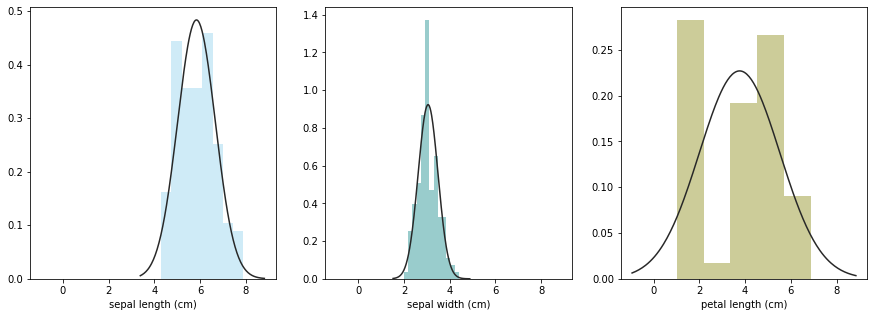

In [3]:
from scipy.stats import norm

colors =["skyblue", "teal", "olive"]
f, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True)
for i, ax in enumerate(axes.flatten()):
    sns.distplot(data.iloc[:, i] , color=colors[i], ax=ax, fit=norm, kde=False)

In [4]:
gnb = GaussianNB().fit(X, y)

print("Model Accuracy: {:.2f}".format(gnb.score(X, y)))

Model Accuracy: 0.96


## Another example on the wine quality dataset:

In [5]:
wine = datasets.load_wine()
X, y = wine.data, wine.target
names = wine.feature_names
names.append('target')
data = pd.DataFrame(np.c_[X,y], columns=names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
gnb = GaussianNB().fit(X, y)

print("Model Accuracy: {:.2f}".format(gnb.score(X, y)))

Model Accuracy: 0.99


##  Bernoulli Naive Bayes 

<br>

For `BernoulliNB` the data is assumed to follow a multivariate Bernoulli distribution. Meaning, each feature is expressed as a binary vector. Thus, we have:

<br>
$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$

In [7]:
from sklearn.naive_bayes import BernoulliNB

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           random_state=12)

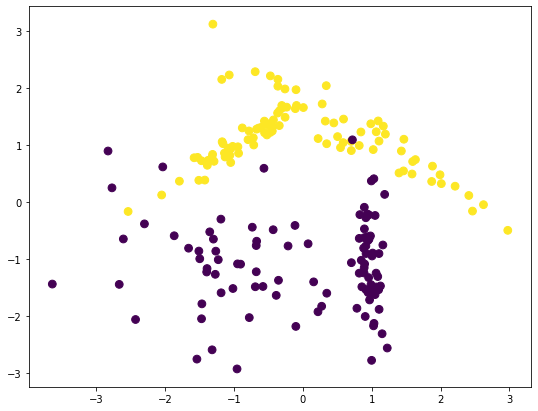

In [9]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(X[:,0], X[:,1], c=y, s=60)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, y_train)

print(bnb.score(X_train, y_train))
print(bnb.score(X_test, y_test))

0.9533333333333334
0.9


### Visualizing Predictions of the BernoulliNB Classifier

[Text(0, 0.5, 'Feature 1'), Text(0.5, 0, 'Feature 0')]

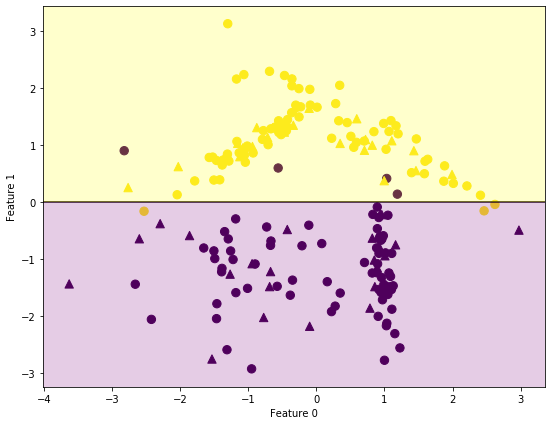

In [12]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['purple', 'yellow'])

fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=70, marker='o')
y_pred = bnb.predict(X_test)
ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, s=70, marker='^')

h = 0.01 # step size in the mesh
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
x_array = np.arange(xmin, xmax, h)
y_array = np.arange(ymin, ymax, h)
xx, yy = np.meshgrid(x_array, y_array)
Z = bnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)
ax.contour(xx, yy, Z, colors='k', linewidths=0.2)
ax.set(xlabel="Feature 0", ylabel="Feature 1")

[Text(0.5, 0, 'Feature 1')]

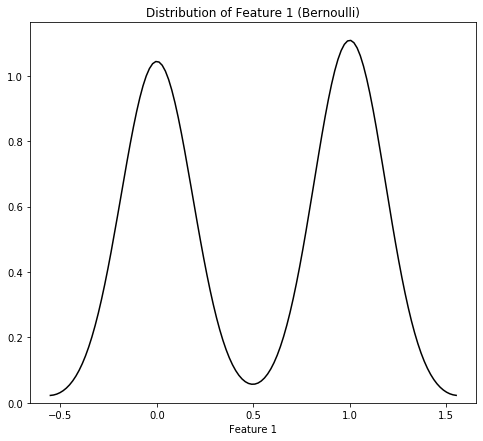

In [13]:
from sklearn.preprocessing import Binarizer

transformer = Binarizer().fit(X[:,1].reshape(-1,1))

binary_features = transformer.transform(X[:,1].reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,7))
sns.distplot(binary_features, hist=False, color="k")
ax.set(title="Distribution of Feature 1 (Bernoulli)")
ax.set(xlabel="Feature 1")

## Multinomial Naive Bayes 

<br> 
For `MultinomialNB` each feature is assumed to follow a multinomial distribtuion. The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ where $\theta_{yi} = {P}(x_i \mid y_j)$ for each feature $i$ given $n$ features.

<br>
The likelihood of each feature in the feature vector, that is, ${P}(x_i \mid y_j)$ can be approximated via the maximum likelihood estimate (MLE) which is equivalent to the relative frequency count. Therefore, ${P}(x_i \mid y_j)$ can be calculated as:


<br> $${P}(x_i \mid y_j) = \frac{N_{x_i, y_j}}{N_{y_j}}$$

<br> 
* $N_{x_i, y_j}$ = the number of times feature $i$ appears in samples from class $y_j$
* $N_{y_j}$ = the total count of all features in class $y_j$

### <br> <font color=k> Additive Smoothing </font>

<br>

**The Zero-Frequency Problem**: If a feature does not exist in the training set $T$ then the class conditional probability will be 0 and as a result ${P}(x_i \mid y_j)$ will be 0. The solution to this problem is called **additive smoothing**. A smoothing term $\alpha$ is added to ${P}(x_i \mid y_j)$ to prevent obtaining a 0 probability for a given feature.

<br>
To summarize we have:



\begin{align*}
\theta_y = (\theta_{y1},\ldots,\theta_{yn}) &&\text{$n$ = # of features}
\end{align*}

$$\theta_{yi} = {P}(x_i \mid y_j) = \frac{N_{x_i, y_j}+\alpha}{N_{y_j} + \alpha \, n}  \quad \text{for $i \in \left \{1,2, \ldots, n \right \}$}$$

<br>
Setting $\alpha = 1$ is known as Laplace smoothing and setting $\alpha < 1$ is known as Lidstone smoothing.

# Popular Multinomial NB Use-Case: Text Classification

There are two common use cases for the Multinomial Naive Bayes variant which involve document classifications tasks. The first uses term-frequency vectors and the second uses Term frequency-inverse document frequency vectors. These will be elaborated on in the following sections.

Before classifying any documents one needs to determine which words in the collection of documents are important for the classifier to consider, in other words, what are the informative words that would allow your classifier to best discriminate between the documents? This list of terms is commonly referred to as the **vocabulary** in document classification.

> ### <font color=dimgrey> **Term Frequency (Tf Vectors)** </font>

Suppose we are given a vocabulary with $m$ terms and a collection $D$ containing $n$ documents. Then, a tf-vector for a document $d_i$ is simply a vector which holds the term frequency $\forall t_j \in \text{vocab}$ appearing in document $d_i$

To summarize:

$$\text{vocab} = \left \{ t_1, t_2, \cdots, t_m \right \}$$

$$D = {d_i} \quad \text{for}\, i \in \left \{1,2, \cdots, n \right \}$$

$$tf(t_j,d_i) = \textrm{number of times term $t_j$ appears in document $d_i$}$$

$$\big \langle tf_{d_i} \big \rangle = \big \langle tf(t_j,d_i) \big \rangle \quad \text{for}\, j \in \left \{1,2, \cdots, m \right \}$$

The feature matrix, $X$, for a collection of documents $D$ using tf-vectors would be:

<br>

$$X = \begin{bmatrix}
\big \langle tf(t_j,d_1) \big \rangle  \\ 
\big \langle tf(t_j,d_2) \big \rangle   \\ 
\vdots \\
\big \langle tf(t_j,d_n) \big \rangle    
\end{bmatrix} \quad \text{note that $X$ is an $n \times m$ matrix}$$

## Example: Classifying Amazon Reviews

> ### <font color=dimgrey> **Term Frequency - Inverse Document Frequency  (Tf-idf Vectors)**</font>

An obvious issue that arises when using simple term frequency counts to represent a document is that documents with higher frequencies of very common words will be inaccurately emphasized. Tf-idf resolves this by weighting each term by its inverse document frequency (idf), that is, how often that term appears in the collection of documents. As a result, the term frequency of terms that are less common will be given a higher weight and the term frequency of more common terms will recieve a smaller weight.

Let the inverse document frequency of some term $t_j$ be defined as:

$$idf(t_j) = \log \left ( \frac{N_d}{N_d(t_j)} \right )$$

<br> 
* $N_{d}$ = the number of documents
* $N_{d}(t_j)$ = the number of documents that contain term $t_j$

<br>

Then the Tf-idf vector for a document $d_i$ is given by:

$$\text{Tf-idf} = \big \langle tf(t_j,d_i) \cdot idf(t_j) \big \rangle \quad \text{for}\, j \in \left \{1,2, \cdots, m \right \}$$



In [14]:
cd data

/Users/ashleypoyer/github/notebooks/data


In [15]:
ls

amazon_cells_labelled.csv*


In [16]:
amazon_reviews = pd.read_csv("amazon_cells_labelled.csv", header=None)

In [17]:
amazon_reviews.head(15)

,0,1,2,3,4,5
0,So there is no way for me to plug it in here i...,0,NaN,NaN,NaN,NaN
1,Good case,Excellent value.,1,NaN,NaN,NaN
2,Great for the jawbone.,1,NaN,NaN,NaN,NaN
3,Tied to charger for conversations lasting more...,0,NaN,NaN,NaN,NaN
4,The mic is great.,1,NaN,NaN,NaN,NaN
5,I have to jiggle the plug to get it to line up...,0,NaN,NaN,NaN,NaN
6,If you have several dozen or several hundred c...,then imagine the fun of sending each of them ...,0,NaN,NaN,NaN
7,If you are Razr owner...you must have this!,1,NaN,NaN,NaN,NaN
8,Needless to say,I wasted my money.,0,NaN,NaN,NaN
9,What a waste of money and time!.,0,NaN,NaN,NaN,NaN


### <font color=k> A little bit of data cleaning </font>

In [18]:
X = []
y = []

for i, record in enumerate(amazon_reviews.iterrows()):
    for j in range(len(record[1])):
        if (pd.isnull(record[1][j]) == True):
            sentiment = record[1][j-1]
            reviews = record[1][:j-1]
            break
        elif j == (len(record[1]) - 1):
            sentiment = record[1][j]
            reviews = record[1][:j]
    
    reviews = reviews.str.cat(sep='')
    X.append(reviews)
    y.append(sentiment)

In [19]:
ar = pd.DataFrame({'review': X, 'sentiment': y}, index=np.arange(len(amazon_reviews.index)))
ar["review"] = ar['review'].str.replace('[^\w\s]','').str.lower()
ar.sentiment = ar.sentiment.astype(int)

In [20]:
ar.head(10)

,review,sentiment
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1
5,i have to jiggle the plug to get it to line up...,0
6,if you have several dozen or several hundred c...,0
7,if you are razr owneryou must have this,1
8,needless to say i wasted my money,0
9,what a waste of money and time,0


### <font color=k> Creating the Term Frequency Feature Matrix (X_tf) </font>

In [21]:
reviews = ar.review
y = ar.sentiment

# split reviews into terms
review_words = [review.split() for review in reviews]


vocab = sorted(set(sum(review_words, [])))
vocab_dict = {k:i for i,k in enumerate(vocab)}

X_tf = np.zeros((len(reviews), len(vocab)), dtype=int)

for i, review in enumerate(review_words):
    for word in review:
        X_tf[i, vocab_dict[word]] += 1

X = X_tf

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9675
0.84


> ### <font color=dimgrey> **Term Frequency - Inverse Document Frequency  (Tf-idf Vectors)**</font>

An obvious issue that arises when using simple term frequency counts to represent a document is that documents with higher frequencies of very common words will be inaccurately emphasized. Tf-idf resolves this by weighting each term by its inverse document frequency (idf), that is, how often that term appears in the collection of documents. As a result, the term frequency of terms that are less common will be given a higher weight and the term frequency of more common terms will recieve a smaller weight.

Let the inverse document frequency of some term $t_j$ be defined as:

$$idf(t_j) = \log \left ( \frac{N_d}{N_d(t_j)} \right )$$

<br> 
* $N_{d}$ = the number of documents
* $N_{d}(t_j)$ = the number of documents that contain term $t_j$

<br>

Then the Tf-idf vector for a document $d_i$ is given by:

$$\text{Tf-idf} = \big \langle tf(t_j,d_i) \cdot idf(t_j) \big \rangle \quad \text{for}\, j \in \left \{1,2, \cdots, m \right \}$$

### <font color=k> Creating the Tf-idf Feature Matrix (X_tfidf) </font>

In [24]:
idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))

X_tfidf = X_tf * idf
X = X_tfidf

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.98625
0.805
